# Clustering

In this notebook I cluster the sign distributions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import copy

from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering

get collective sign distributions:

In [2]:
# load one collective sign distribution
def get_collective_sign_distr(n, name):

    # collect all the sign distributions in one huge dataFrame
    coll_sign_distr = pd.DataFrame()
    for i in range(n):
        sign_distr = pd.read_csv(f'2b Sign distributions/{name}_{i}_sign_distr.csv')
        coll_sign_distr = pd.concat([coll_sign_distr, sign_distr])
    # seperate the dataframe by layer
    coll_sign_distr_layer1 = coll_sign_distr[coll_sign_distr["layer"]=="dense1"][["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]
    coll_sign_distr_layer2 = coll_sign_distr[coll_sign_distr["layer"]=="dense2"][["prune_rate_in", "prune_rate_out", "sign_rate_in", "sign_rate_out"]]
    
    return coll_sign_distr_layer1, coll_sign_distr_layer2

In [3]:
coll_sign_distr_layer1, coll_sign_distr_layer2 = get_collective_sign_distr(15, "CIFAR_IMP")

turn dataframe into array:

In [4]:
# preprocess the data

sign_distr_array = []
for index, row in coll_sign_distr_layer1.iterrows():
    sign_distr_array.append(row.to_numpy())
sign_distr_array = np.array(sign_distr_array)
#print(sign_distr_array)

perform clustering:

In [5]:
# perform clustering

#clustering = SpectralClustering(n_clusters=2, assign_labels='discretize',)
clustering = AgglomerativeClustering(n_clusters=2)
#clustering = KMeans(n_clusters=2)
clustering.fit(sign_distr_array)
labels = clustering.labels_

add the labels to the dataframe:

In [6]:
# add labels to dataframe

labels_df = pd.DataFrame(labels, index=range(len(labels)),columns=["cluster"])
coll_sign_distr_layer1 = coll_sign_distr_layer1.reset_index(drop=True)
coll_sign_distr_layer1 = pd.concat([coll_sign_distr_layer1, labels_df], axis=1)
display(coll_sign_distr_layer1)

,prune_rate_in,prune_rate_out,sign_rate_in,sign_rate_out,cluster
0,0.913391,0.218750,0.559549,0.480000,0
1,0.891235,0.226562,0.511785,0.515152,0
2,0.890381,0.250000,0.522272,0.421875,0
3,0.916016,0.320312,0.549419,0.574713,0
4,0.949463,0.355469,0.485507,0.521212,0
...,...,...,...,...,...
3676,0.891052,0.257812,0.513165,0.521053,0
3677,0.998047,0.261719,0.375000,0.576720,0
3678,0.906494,0.238281,0.507180,0.507692,0
3679,0.894592,0.269531,0.471338,0.481283,0


visualize the dataframe:

C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\envs\iannwtf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

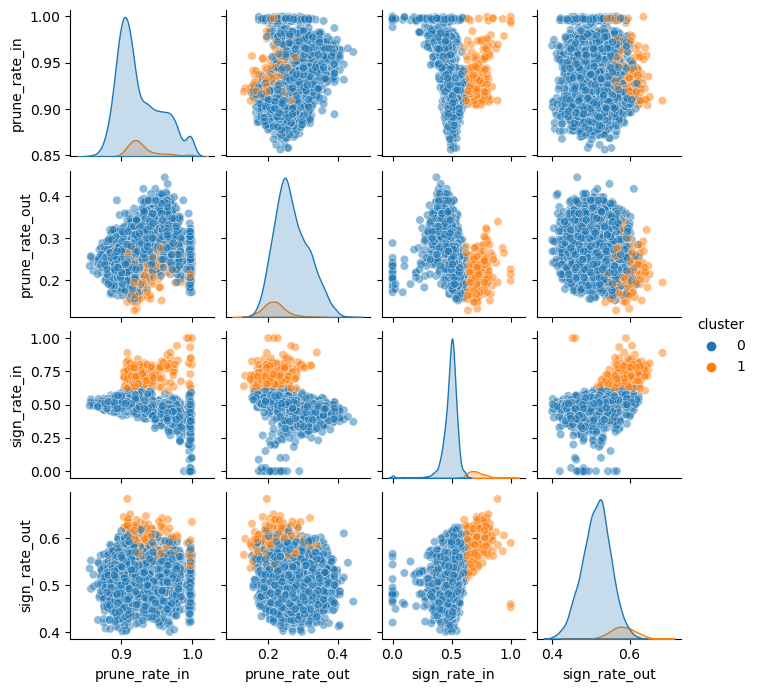

In [7]:
# visualize clusters in the same scatter plot matrixes
sns.pairplot(coll_sign_distr_layer1, hue="cluster", height=1.75, kind='scatter', plot_kws={'alpha':0.5})

In [8]:
# try more different clustering algorithms